# Question 1

If there are 2 matrices: mat1: n * k and mat2: k * m, the first operation is to perform dot product of first column of mat2 with first row of mat1. In this operation ith element from the start of column 1 of mat2 gets multiplied with ith element from the start of row 1 of mat1, followed by addition of these individual products. This total operation of dot product makes k multiplication and k-1 additions.

Now this dot product is performed for n different rows of mat1, then total multiplications and additions become n * k and n * (k-1).

Since there are m columns in mat2, this operation is again performed m times (i.e number of columns in mat2). Hence total number of multiplications and addition operations performed become **m * n * k** and **m * n * (k-1)**.

# Question 2

In [5]:
def matrix_multiply(mat1, mat2):
    rows1, cols1 = len(mat1), len(mat1[0])
    rows2, cols2 = len(mat2), len(mat2[0])

    if cols1 != rows2:
        print("Dimensions don't match!!!")
        return 0

    result = [[0 for _ in range(cols2)] for _ in range(rows1)]
    for i in range(rows1):
        for j in range(cols2):
            for k in range(cols1):
                result[i][j] += mat1[i][k] * mat2[k][j]
    return result


import time
import numpy as np
import random

mat1 = [[random.randint(1, 100) for _ in range(20)] for _ in range(30)] # shape: 30 * 20
mat2 = [[random.randint(1, 100) for _ in range(50)] for _ in range(20)] # shape: 20 * 50

start1 = time.time()
final_matrix1 = matrix_multiply(mat1, mat2) # shape: 30 * 50
end1 = time.time()

print(f"Normal Multiplication: {end1 - start1}s")
start2 = time.time()
final_matrix2 = np.matmul(mat1, mat2)
end2 = time.time()
print(f"Numpy Multiplication: {end2 - start2}s")
print(" ")
print(f"For normal multiplication time is {(end1 - start1)/(end2 - start2)} times numpys's matmul function. Hence numpy's matmul function is faster.")

Normal Multiplication: 0.010146379470825195s
Numpy Multiplication: 0.0010089874267578125s
 
For normal multiplication time is 10.056001890359168 times numpys's matmul function. Hence numpy's matmul function is faster.


Numpy's matmul function doesn't use loops for the calculation that take much time and memory to perform calculations. Rather, it uses parallelize operations, and efficient way of cache memory to perform operations. It uses vectorisation techniques and Linear Algebra libraries to perform those operations.

# Question 3

In [6]:
import timeit

def median_using_sort(arr):
    sorted_arr = np.sort(arr)
    n = len(sorted_arr)
    if n % 2 == 1:
        return sorted_arr[n // 2]
    else:
        return (sorted_arr[(n // 2) - 1] + sorted_arr[n // 2]) / 2

def numpy_median(arr):
    return np.median(arr)

np.random.seed(42)
arr = np.random.randint(1, 100, size=100000)

time_sort = timeit.timeit(lambda: median_using_sort(arr), number=10)
time_np_median = timeit.timeit(lambda: numpy_median(arr), number=10)

print("Time taken using sorting method:", time_sort)
print("Time taken using NumPy's median:", time_np_median)

Time taken using sorting method: 0.03735580000000027
Time taken using NumPy's median: 0.006710499999996955


# Question 4

(<matplotlib.image.AxesImage at 0x2d4e5d41ee0>, (-0.5, 1599.5, 892.5, -0.5))

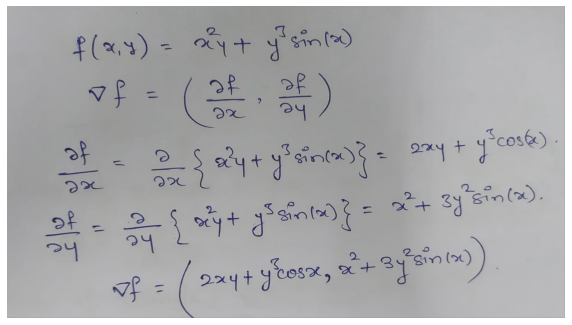

In [7]:
import matplotlib.pyplot as plt

img = plt.imread("img.jpg")
plt.figure(figsize=(10,7))
plt.imshow(img), plt.axis('off')

# Question 5

In [8]:
import jax
import jax.numpy as jnp

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

def grad_analytical(x, y):
    df_dx = 2 * x * y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3 * y**2 * jnp.sin(x)
    return df_dx, df_dy

grad_jax = jax.grad(f, argnums=(0, 1))

x_values = np.random.uniform(-5, 5, size=(5,))
y_values = np.random.uniform(-5, 5, size=(5,))
error = 0

for x, y in zip(x_values, y_values):
    grad_analytical_val = list(grad_analytical(x, y))
    grad_jax_val = list(grad_jax(x, y))
    
    print(f"x = {x}, y = {y}")
    print("Analytical Gradient:", grad_analytical_val)
    print("JAX Gradient:", grad_jax_val)
    error = error + abs(grad_analytical_val[0] - grad_jax_val[0])
    print()
    
print(f'Total absolute error is {error}') # Error nearly equal to zero

x = 1.1796621079363456, y = 1.6474515625476158
Analytical Gradient: [Array(5.5915146, dtype=float32), Array(8.918964, dtype=float32)]
JAX Gradient: [Array(5.5915146, dtype=float32), Array(8.918964, dtype=float32)]

x = -1.4165497501961433, y = -0.9879792165101904
Analytical Gradient: [Array(2.650882, dtype=float32), Array(-0.8869293, dtype=float32)]
JAX Gradient: [Array(2.6508822, dtype=float32), Array(-0.8869295, dtype=float32)]

x = 2.4547316574603393, y = 0.5072818403896227
Analytical Gradient: [Array(2.3895419, dtype=float32), Array(6.515246, dtype=float32)]
JAX Gradient: [Array(2.3895419, dtype=float32), Array(6.515246, dtype=float32)]

x = -2.5717571527905694, y = 2.3756815064118575
Analytical Gradient: [Array(-23.508766, dtype=float32), Array(-2.5205483, dtype=float32)]
JAX Gradient: [Array(-23.508764, dtype=float32), Array(-2.5205488, dtype=float32)]

x = 4.646639387753369, y = 2.973221484639634
Analytical Gradient: [Array(25.904095, dtype=float32), Array(-4.871578, dtype=float

# Question 6

In [9]:
import sympy as sp

x, y = sp.symbols('x y')
f = x**2 * y + y**3 * sp.sin(x)

grad_x = sp.diff(f, x)
grad_y = sp.diff(f, y)

print("Sympy Gradient:")
print(f"∂f/∂x = {grad_x}")
print(f"∂f/∂y = {grad_y}")
# Same as Computed manually

Sympy Gradient:
∂f/∂x = 2*x*y + y**3*cos(x)
∂f/∂y = x**2 + 3*y**2*sin(x)


# Question 7

In [10]:
students_records = {'2022': {'Branch 1': {'Roll Number': 1, 'Name': 'Mayur', 'Marks': {'Maths': 96, 'English': 94}},
                             'Branch 2': {'Roll Number': 2, 'Name': 'Raj', 'Marks': {'Physics': 94, 'Politics': 61}}},
                    '2023': {'Branch 1': {'Roll Number': 1, 'Name': 'Mahesh', 'Marks': {'Maths': 94, 'Science': 61}},
                             'Branch 2': {'Roll Number': 2, 'Name': 'Ajit', 'Marks': {'Maths': 94, 'English': 61}}},
                   '2024': {'Branch 1': {'Roll Number': 1, 'Name': 'Abhishek', 'Marks': {'Maths': 94, 'English': 61}},
                             'Branch 2': {'Roll Number': 2, 'Name': 'Junaid', 'Marks': {'History': 94, 'Science': 61}}},
                    '2025': {'Branch 1': {'Roll Number': 1, 'Name': 'Shubham', 'Marks': {'Chemistry': 94, 'Biology': 61}},
                             'Branch 2': {'Roll Number': 2, 'Name': 'Sita', 'Marks': {'Economics': 94, 'Arts': 61}}}}
students_records

{'2022': {'Branch 1': {'Roll Number': 1,
   'Name': 'Mayur',
   'Marks': {'Maths': 96, 'English': 94}},
  'Branch 2': {'Roll Number': 2,
   'Name': 'Raj',
   'Marks': {'Physics': 94, 'Politics': 61}}},
 '2023': {'Branch 1': {'Roll Number': 1,
   'Name': 'Mahesh',
   'Marks': {'Maths': 94, 'Science': 61}},
  'Branch 2': {'Roll Number': 2,
   'Name': 'Ajit',
   'Marks': {'Maths': 94, 'English': 61}}},
 '2024': {'Branch 1': {'Roll Number': 1,
   'Name': 'Abhishek',
   'Marks': {'Maths': 94, 'English': 61}},
  'Branch 2': {'Roll Number': 2,
   'Name': 'Junaid',
   'Marks': {'History': 94, 'Science': 61}}},
 '2025': {'Branch 1': {'Roll Number': 1,
   'Name': 'Shubham',
   'Marks': {'Chemistry': 94, 'Biology': 61}},
  'Branch 2': {'Roll Number': 2,
   'Name': 'Sita',
   'Marks': {'Economics': 94, 'Arts': 61}}}}

# Question 8

In [11]:
class Student:
    def __init__(self, name, roll_number):
        self.name = name
        self.roll_number = roll_number
        self.marks = {}
    def add_marks(self, subject, marks):
        self.marks[subject] = marks


class Branch:
    def __init__(self):
        self.students = []

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []
    def add_branch(self, branch):
        self.branches.append(branch)


student1 = Student("Ramu", 1)
student1.add_marks("Maths", 62)
student1.add_marks("English", 76)

student2 = Student("Shamu", 2)
student2.add_marks("Maths", 90)
student2.add_marks("English", 80)

branch1 = Branch()
branch1.students.append(student1)

branch2 = Branch()
branch2.students.append(student2)

year_2022 = Year(2022)
year_2022.add_branch(branch1)
year_2022.add_branch(branch2)

year_2023 = Year(2023)

overall_database = [year_2022, year_2023]

# Question 9

C:\Users\Mayur\AppData\Local\Temp\ipykernel_44620\1120882073.py:32: RuntimeWarning: invalid value encountered in divide
  y5 = (np.sin(x))/x
C:\Users\Mayur\AppData\Local\Temp\ipykernel_44620\1120882073.py:38: RuntimeWarning: divide by zero encountered in log
  y6 = np.log(x)


Text(0.5, 1.0, 'y = exp(x)')

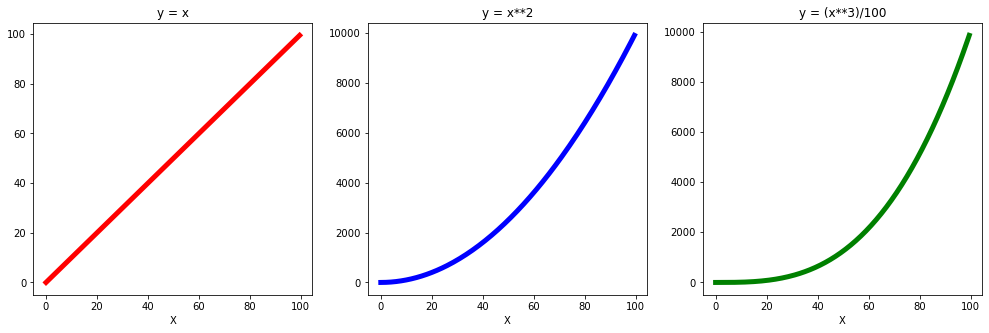

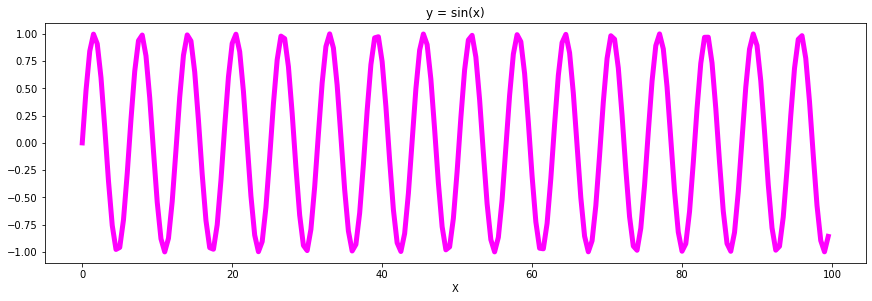

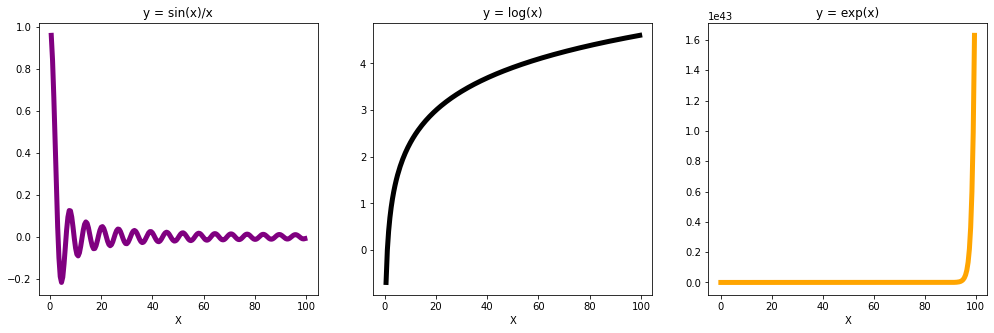

In [12]:
plt.figure(figsize=(17,17))

x = np.arange(0, 100, 0.5)

plt.subplot(3,3,1)
y1 = x
plt.plot(x, y1, color = 'red', linewidth = 5)
plt.xlabel('X')
plt.title("y = x")

plt.subplot(3,3,2)
y2 = x**2
plt.plot(x, y2, color = 'blue', linewidth = 5)
plt.xlabel('X')
plt.title("y = x**2")

plt.subplot(3,3,3)
y3 = (x**3)/100
plt.plot(x, y3, color = 'green', linewidth = 5)
plt.xlabel('X')
plt.title("y = (x**3)/100")

plt.figure(figsize=(50,15))
plt.subplot(3,3,4)
y4 = np.sin(x)
plt.plot(x, y4, color = 'magenta', linewidth = 5)
plt.xlabel('X')
plt.title("y = sin(x)")

plt.figure(figsize=(17,17))
plt.subplot(3,3,1)
y5 = (np.sin(x))/x
plt.plot(x, y5, color = 'purple', linewidth = 5)
plt.xlabel('X')
plt.title("y = sin(x)/x")

plt.subplot(3,3,2)
y6 = np.log(x)
plt.plot(x, y6, color = 'black', linewidth = 5)
plt.xlabel('X')
plt.title("y = log(x)")

plt.subplot(3,3,3)
y7 = np.exp(x)
plt.plot(x, y7, color = 'orange', linewidth = 5)
plt.xlabel('X')
plt.title("y = exp(x)")

# Question 10

In [13]:
import pandas as pd
matrix = np.random.uniform(1,2,(20,5))
df = pd.DataFrame(matrix, columns=['a','b','c','d','e'])
df.head()

,a,b,c,d,e
0,1.974959,1.208957,1.504439,1.091458,1.082274
1,1.104333,1.259504,1.696335,1.861135,1.435996
2,1.555203,1.206367,1.791081,1.888354,1.485597
3,1.160874,1.005102,1.536411,1.497636,1.925809
4,1.036484,1.148952,1.197687,1.547125,1.284736


In [14]:
std = df.std(axis = 0)
print(std)
highest_std_column = max(std)
print()
print("Column with highest std is: ", std[std == highest_std_column])

a    0.327018
b    0.247787
c    0.250870
d    0.329867
e    0.266612
dtype: float64

Column with highest std is:  d    0.329867
dtype: float64


In [15]:
means = df.mean(axis = 1)
print(means[:8])
lowest_mean_row = min(means)
print()
print("Row with lowest mean is:", means[means == lowest_mean_row])

0    1.372417
1    1.471460
2    1.585320
3    1.425166
4    1.242997
5    1.519402
6    1.487125
7    1.614589
dtype: float64

Row with lowest mean is: 4    1.242997
dtype: float64


# Question 11

In [16]:
sums = df['a'] + df['b'] + df['c'] + df['d'] + df['e']
df = df.assign(f = sums)
new = df['f']>8
new.replace(to_replace=True, value='GT8', inplace=True)
new.replace(to_replace=False, value='LT8', inplace=True)
df = df.assign(g = new)
df.head()

,a,b,c,d,e,f,g
0,1.974959,1.208957,1.504439,1.091458,1.082274,6.862087,LT8
1,1.104333,1.259504,1.696335,1.861135,1.435996,7.357301,LT8
2,1.555203,1.206367,1.791081,1.888354,1.485597,7.926602,LT8
3,1.160874,1.005102,1.536411,1.497636,1.925809,7.125832,LT8
4,1.036484,1.148952,1.197687,1.547125,1.284736,6.214983,LT8


In [17]:
print("Total rows where g = LT8 is:", df.count('g' == 'LT8')[0])
print("std of column f where column g = LT8 is:", df[df['g'] == 'LT8']['f'].std())
print("std of column f where column g = GT8 is:", df[df['g'] == 'GT8']['f'].std())

Total rows where g = LT8 is: 20
std of column f where column g = LT8 is: 0.4277398937160187
std of column f where column g = GT8 is: 0.20739126841106767


# Question 12

In [18]:
x = 2
y = np.array([45, 56, 12])
x + y # each term of y increases by 2 (i.e, x), this is because x is broadcasted to x = [2, 2, 2] i.e, in the shape of y

array([47, 58, 14])

# Question 13

In [19]:
def argmin_function(arr):
    min_index = 0
    min_val = arr[min_index]
    for i in range(1, len(arr)):
        if arr[i] < min_val:
            min_val = arr[i]
            min_index = i
    return min_index

arr = np.array([4, 8, 2, 5, 1])
result_custom_argmin = argmin_function(arr)
print("Written argmin result:", result_custom_argmin)

result_np_argmin = np.argmin(arr)
print("np.argmin result:", result_np_argmin)

print("Results match:", result_custom_argmin == result_np_argmin)

Written argmin result: 4
np.argmin result: 4
Results match: True
